In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [97]:
dataframe = pd.read_csv("steam_reviews.csv",nrows=5000000)
print(dataframe.columns)

Index(['Unnamed: 0', 'app_id', 'app_name', 'review_id', 'language', 'review',
       'timestamp_created', 'timestamp_updated', 'recommended',
       'votes_helpful', 'votes_funny', 'weighted_vote_score', 'comment_count',
       'steam_purchase', 'received_for_free', 'written_during_early_access',
       'author.steamid', 'author.num_games_owned', 'author.num_reviews',
       'author.playtime_forever', 'author.playtime_last_two_weeks',
       'author.playtime_at_review', 'author.last_played'],
      dtype='object')


In [100]:
print(dataframe.shape)

(5000000, 23)

In this dataset we have _Nrows_ and 23 variables. 

In [107]:
dataframe.head(3)

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1.611343e+09
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1.611386e+09
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1.611384e+09


In [118]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               int64  
 7   timestamp_updated               int64  
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned     

- 

True     0.918528
False    0.081472
Name: recommended, dtype: float64
(-0.001, 1.0]        0.886046
(1.0, 2.0]           0.047490
(2.0, 3.0]           0.019153
(3.0, 5.0]           0.016010
(5.0, 10.0]          0.013248
(10.0, 50.0]         0.013231
(50.0, 3631553.0]    0.004821
Name: votes_helpful, dtype: float64
(-0.001, 1.0]        0.960592
(1.0, 2.0]           0.016604
(2.0, 3.0]           0.006336
(3.0, 5.0]           0.005297
(5.0, 10.0]          0.004262
(10.0, 50.0]         0.004723
(50.0, 4420522.0]    0.002186
Name: votes_funny, dtype: float64


<Figure size 432x288 with 0 Axes>

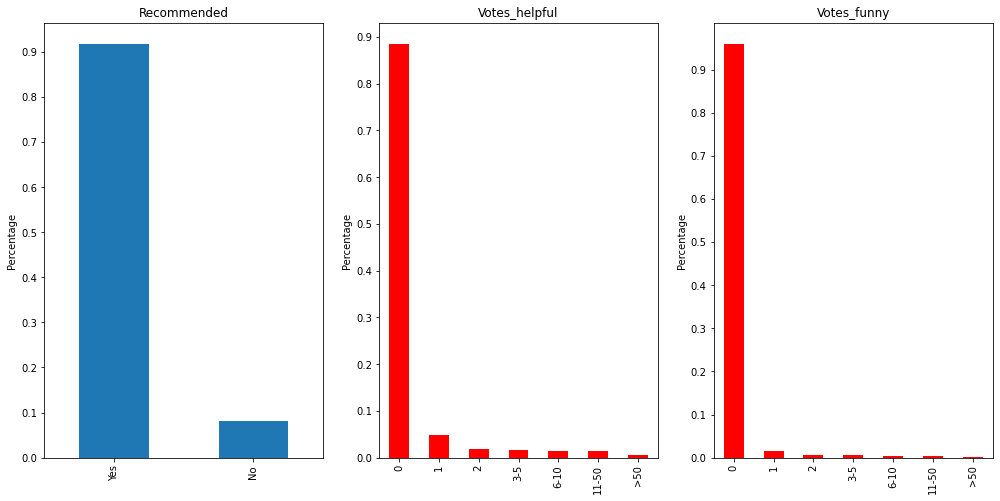

In [245]:
recomm_amount = dataframe["recommended"].value_counts()
recomm_amount = recomm_amount/sum(recomm_amount)
#print(recomm_amount)

helpful=dataframe["votes_helpful"].value_counts()
my_bins=[0,1,2,3,5,10,50,max(helpful)]
out=pd.cut(dataframe["votes_helpful"],bins=my_bins,include_lowest=True)
ax=out.value_counts(sort=False)
ax=ax/sum(ax)
#print(ax)

funny=dataframe["votes_funny"].value_counts()
my_bins=[0,1,2,3,5,10,50,max(funny)]
out2=pd.cut(dataframe["votes_funny"],bins=my_bins,include_lowest=True)
bx=out2.value_counts(sort=False)
bx=bx/sum(bx)
#print(bx)



plt.figure()
fig=plt.figure(figsize=(17,8))
plt.subplot(131)
recomm_amount.plot.bar(
    title='Recommended',
ylabel='Percentage',)
plt.yticks(np.arange(0,1,0.1))
plt.xticks([0,1],['Yes','No'])

plt.subplot(132)
ax.plot.bar(color='r',title="Votes_helpful",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5,6],['0','1','2','3-5','6-10','11-50','>50'])
plt.yticks(np.arange(0,1,0.1))

plt.subplot(133)
bx.plot.bar(color='r',title="Votes_funny",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5,6],['0','1','2','3-5','6-10','11-50','>50'])
plt.yticks(np.arange(0,1,0.1))

plt.show()

(0.999, 2.0]       0.757158
(2.0, 3.0]         0.069982
(3.0, 4.0]         0.036138
(4.0, 5.0]         0.022360
(5.0, 6.0]         0.015546
(6.0, 7.0]         0.011467
(7.0, 8.0]         0.008775
(8.0, 9.0]         0.006930
(9.0, 10.0]        0.005688
(10.0, 20.0]       0.027858
(20.0, 30.0]       0.010677
(30.0, 40.0]       0.006026
(40.0, 50.0]       0.003781
(50.0, 11574.0]    0.017614
Name: votes_helpful, dtype: float64
(1.999, 3.0]       0.584833
(3.0, 4.0]         0.086795
(4.0, 5.0]         0.053703
(5.0, 6.0]         0.037338
(6.0, 7.0]         0.027541
(7.0, 8.0]         0.021075
(8.0, 9.0]         0.016644
(9.0, 10.0]        0.013662
(10.0, 20.0]       0.066908
(20.0, 30.0]       0.025644
(30.0, 40.0]       0.014473
(40.0, 50.0]       0.009081
(50.0, 11574.0]    0.042305
Name: votes_helpful, dtype: float64


<Figure size 432x288 with 0 Axes>

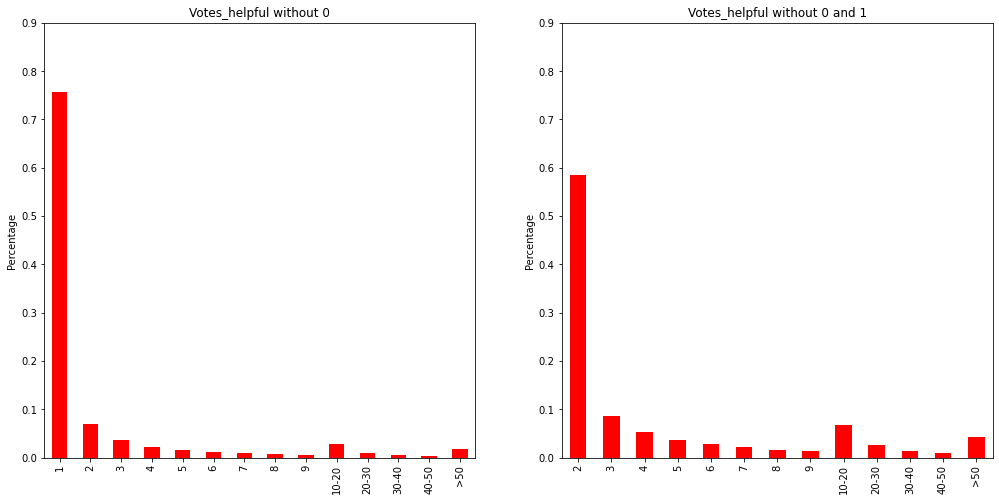

In [278]:
##TEST!
##Analyzing the comments without 0 helpful vote and without 0 and 1, the most commons
helpful2=dataframe[dataframe.votes_helpful>0]["votes_helpful"]
my_bins=[1,2,3,4,5,6,7,8,9,10,20,30,40,50,max(helpful2)]
out=pd.cut(helpful2,bins=my_bins,include_lowest=True)
ax=out.value_counts(sort=False)
ax=ax/sum(ax)
#print(ax)


plt.figure()
fig=plt.figure(figsize=(17,8))
plt.subplot(121)
ax.plot.bar(color='r',title="Votes_helpful without 0",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13],['1','2','3','4','5','6','7','8','9','10-20','20-30','30-40','40-50','>50'])
plt.yticks(np.arange(0,1,0.1))


helpful3=dataframe[dataframe.votes_helpful>1]["votes_helpful"]
my_bins=[2,3,4,5,6,7,8,9,10,20,30,40,50,max(helpful2)]
out2=pd.cut(helpful2,bins=my_bins,include_lowest=True)
bx=out2.value_counts(sort=False)
bx=bx/sum(bx)
#print(bx)

plt.subplot(122)
bx.plot.bar(color='r',title="Votes_helpful without 0 and 1",ylabel='Percentage')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12],['2','3','4','5','6','7','8','9','10-20','20-30','30-40','40-50','>50'])
plt.yticks(np.arange(0,1,0.1))


plt.show()

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

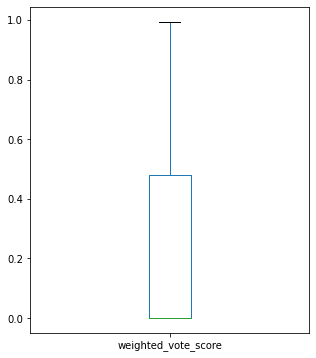

In [306]:
weighted=dataframe["weighted_vote_score"]
plt.figure()
fig=plt.figure(figsize=(5,6))

#weighted.plot(kind='box')

In [255]:
dataframe.corr()

,Unnamed: 0,app_id,review_id,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,weighted_vote_score,comment_count,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
Unnamed: 0,1.000000,0.524016,0.124508,0.137937,0.130387,-0.056750,0.007424,-0.001135,0.000079,-0.005111,-0.008731,-0.002604,0.206403,0.000301,0.000312,0.004471,-0.070620,0.017652,-0.083798,0.112901
app_id,0.524016,1.000000,0.301433,0.334128,0.322653,-0.216370,0.017234,-0.001708,0.032927,-0.001978,0.005030,-0.008399,0.204868,0.018527,-0.000483,-0.007531,-0.114138,0.026615,-0.120711,0.181634
review_id,0.124508,0.301433,1.000000,0.971143,0.935846,0.030895,-0.021407,-0.005681,-0.207032,-0.050546,0.089569,0.035097,-0.171629,0.465596,-0.000412,-0.075352,-0.087793,0.130702,-0.018985,0.481795
timestamp_created,0.137937,0.334128,0.971143,1.000000,0.962345,0.016022,-0.019064,-0.005238,-0.185133,-0.048724,0.097820,0.042656,-0.146601,0.437671,-0.000356,-0.070705,-0.083226,0.110265,-0.020076,0.507079
timestamp_updated,0.130387,0.322653,0.935846,0.962345,1.000000,0.012449,-0.017018,-0.005024,-0.169687,-0.040561,0.094722,0.040644,-0.156496,0.423419,-0.000389,-0.054913,-0.042971,0.118901,0.025457,0.521500
recommended,-0.056750,-0.216370,0.030895,0.016022,0.012449,1.000000,-0.040110,-0.000718,-0.200645,-0.070795,0.052154,-0.006647,-0.033081,0.070616,0.000133,-0.034174,0.025064,0.013823,0.018574,0.102224
votes_helpful,0.007424,0.017234,-0.021407,-0.019064,-0.017018,-0.040110,1.000000,0.000188,0.139252,0.455662,-0.007515,-0.001804,0.012933,-0.020569,-0.000027,0.022552,0.013719,-0.000064,0.010817,-0.014154
votes_funny,-0.001135,-0.001708,-0.005681,-0.005238,-0.005024,-0.000718,0.000188,1.000000,0.007391,0.000864,-0.000161,-0.000447,0.001568,-0.002586,-0.000002,0.000784,0.000731,-0.000702,0.000374,-0.002107
weighted_vote_score,0.000079,0.032927,-0.207032,-0.185133,-0.169687,-0.200645,0.139252,0.007391,1.000000,0.108773,-0.049887,0.010462,0.066515,-0.129955,-0.000295,0.093872,0.061811,-0.009946,0.028476,-0.083499
comment_count,-0.005111,-0.001978,-0.050546,-0.048724,-0.040561,-0.070795,0.455662,0.000864,0.108773,1.000000,-0.009925,0.003231,0.012483,-0.031849,-0.000033,0.034760,0.041907,0.004207,0.032701,-0.025770
